In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits() # create bunch object (dictionary)

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
digits.data.shape

(1797, 64)

In [8]:
import matplotlib

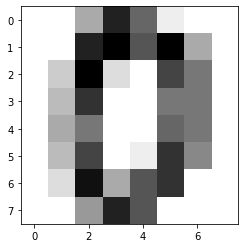

In [9]:
plt.imshow(digits.images[0], cmap=matplotlib.cm.binary)

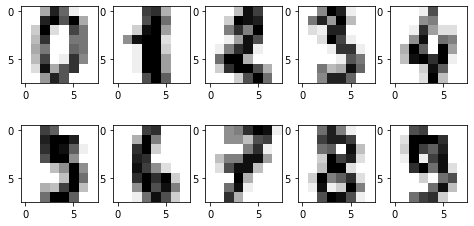

In [12]:
f, axs = plt.subplots(2,5, figsize=(8,4))
for n, ax in enumerate(axs.flatten()):
    ax.imshow(digits.images[n], cmap=matplotlib.cm.binary)

In [13]:
from sklearn.linear_model import Perceptron

In [14]:
perceptron = Perceptron()


In [15]:
y = digits.target == 9

In [16]:
np.unique(y)

array([False,  True])

In [17]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
perceptron.fit(digits.data, y)

Perceptron()

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y, perceptron.predict(digits.data))

array([[1613,    4],
       [  16,  164]])

In [22]:
accuracy_score(y, perceptron.predict(digits.data))

0.9888703394546466

In [23]:
perceptron.coef_ # vector w of weights

array([[   0.,  -73.,  -60.,   59.,  -37., -166.,  -61.,  -74.,   -3.,
          27.,  101.,   27.,   -1.,   27.,   99.,  -78.,   -8.,   65.,
          91.,   43.,   23.,  284.,  -17.,  -88.,   -3.,  -98.,   75.,
         161.,  -51.,  178.,  -66.,   -8.,    0., -259., -107.,  209.,
        -199., -119.,   10.,    0.,    0.,  -31., -335., -551., -258.,
         -99.,  -98.,    4.,    0.,   63.,  -36.,  -14.,  -64., -104.,
         -29.,   22.,    0.,  -42.,  -90.,  -88.,    5.,  -23.,  -18.,
         -15.]])

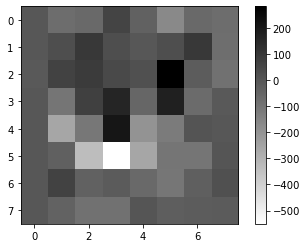

In [25]:
plt.imshow(perceptron.coef_.reshape(8,8), 
           cmap=matplotlib.cm.binary)
plt.colorbar()

In [26]:
perceptron.intercept_

array([-38.])

In [28]:
perceptron.intercept_ + np.dot(digits.data[0, :],
                               perceptron.coef_[0])

array([-4477.])

In [29]:
digits.data[0, :]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [30]:
perceptron.predict(digits.data[[0], :])

array([False])

In [31]:
perceptron.intercept_ + np.dot(digits.data[9, :],
                               perceptron.coef_[0])

array([2794.])

In [32]:
perceptron.predict(digits.data[[9], :])

array([ True])

# Probability estimation

In [33]:
from sklearn.linear_model import LogisticRegression

In [39]:
z = np.dot(digits.data, perceptron.coef_[0]) + perceptron.intercept_

In [43]:
clf = LogisticRegression()
clf.fit(z[:, np.newaxis], y)


LogisticRegression()

In [45]:
clf.predict_proba(z[:, np.newaxis])[:10,:]

array([[9.97320401e-01, 2.67959922e-03],
       [9.99999931e-01, 6.94965301e-08],
       [9.99999996e-01, 3.68640869e-09],
       [9.98912229e-01, 1.08777109e-03],
       [1.00000000e+00, 2.44313282e-12],
       [4.08378333e-01, 5.91621667e-01],
       [1.00000000e+00, 3.52899197e-11],
       [9.99997137e-01, 2.86251004e-06],
       [9.99981775e-01, 1.82253464e-05],
       [9.91147235e-03, 9.90088528e-01]])

# Multiclass problem

In [46]:
mcp = Perceptron()

In [47]:
mcp.fit(digits.data, digits.target)

Perceptron()

In [48]:
mcp.intercept_

array([ -5., -52.,  -7., -23.,   4., -12., -17.,  -4., -69., -35.])

In [49]:
mcp.coef_.shape

(10, 64)

In [50]:
y_hat = mcp.predict(digits.data)

In [52]:
np.unique(y_hat)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
accuracy_score(digits.target, y_hat)

0.9393433500278241

In [54]:
confusion_matrix(digits.target, y_hat)

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 181,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   4, 172,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2, 178,   0,   0,   0,   2,   0,   0],
       [  0,   4,   0,   0, 177,   0,   0,   0,   0,   0],
       [  0,   6,   2,   3,   0, 167,   0,   2,   0,   2],
       [  1,   5,   0,   0,   1,   0, 174,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   0,   1],
       [  0,  38,   7,   3,   1,   0,   0,   1, 123,   1],
       [  0,  10,   1,   3,   0,   1,   0,   5,   0, 160]])

# PCA analysis of model

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = make_pipeline(StandardScaler(), PCA(n_components=2))
pca.fit(mcp.coef_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [57]:
PC = pca.transform(mcp.coef_)

In [58]:
pca.named_steps.keys()

dict_keys(['standardscaler', 'pca'])

In [64]:
pca = make_pipeline(StandardScaler(), PCA())
pca.fit(mcp.coef_)
explained_variance = pca.named_steps['pca'].explained_variance_

In [65]:

explained_variance / np.sum(explained_variance)

array([2.08583375e-01, 1.66291436e-01, 1.30438108e-01, 1.28381518e-01,
       1.10931454e-01, 8.72585911e-02, 7.19854645e-02, 6.25685494e-02,
       3.35615041e-02, 6.72153694e-33])

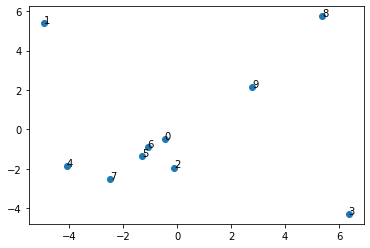

In [63]:
plt.plot(PC[:, 0], PC[:, 1], 'o')
for x, y, s in zip(PC[:, 0], PC[:, 1], range(10)):
    plt.text(x, y, str(s))